In [1]:
%cd /home/lcc/projects/MetaHarmonizer

/home/lcc/projects/MetaHarmonizer


/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import gevent.monkey

gevent.monkey.patch_all(thread=False, select=False)

True

In [3]:
import pandas as pd
from importlib import reload
from src.models import ontology_mapper_st as om_st
from src.Engine import ontology_mapping_engine as ome
import src.models.ontology_mapper_lm as om_lm
import src.models.ontology_mapper_rag_faiss as om_rag

reload(om_st)
reload(ome)
reload(om_lm)
reload(om_rag)

/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lcc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/lcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lcc/nltk_data...
[nltk_data]   Package

<module 'src.models.ontology_mapper_rag_faiss' from '/home/lcc/projects/MetaHarmonizer/src/models/ontology_mapper_rag_faiss.py'>

In [4]:
from src.models.calc_stats import CalcStats

calc = CalcStats()

**Diseases**

In [5]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv('./data/corpus/cbio_disease/disease_query_for_NCIT:C3262.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

LM Strategy

In [6]:
# LM Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',  # SapBERT is already CLS so no need to use 'lm' strategy
    **other_params)
lm_sapbert_result = onto_engine_large.run()

14/06//2025 06:14:1749950061 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:14:1749950061 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:14:1749950061 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:14:1749950061 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:14:1749950061 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
14/06//2025 06:14:1749950061 PM - INFO - OntoMapST.get_match_results: Creating embeddings for query_list and corpus


No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.


14/06//2025 06:14:1749950067 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:14:1749950068 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:14:1749950070 PM - INFO - OntoMapST.get_match_results: Results Generated


In [7]:
lm_sapbert_accuracy_df = calc.calc_accuracy(lm_sapbert_result)
print(lm_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  81.262073
1  Top 3 Matches  86.928525
2  Top 5 Matches  89.117836


In [10]:
lm_sapbert_result.to_csv("lm_sapbert_result.csv", index=False)

In [8]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:15:1749950108 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:15:1749950108 PM - INFO - OntoMapLM: Initialized OntoMap Language Model module
14/06//2025 06:15:1749950108 PM - INFO - OntoMapLM.get_match_results: Creating embeddings for query_list and corpus
14/06//2025 06:15:1749950155 PM - INFO - OntoMapLM.get_mat

In [9]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
lm_pubmedbert_accuracy = lm_pubmedbert_accuracy_df[
    lm_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]

print(lm_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  76.497102
1  Top 3 Matches  82.034771
2  Top 5 Matches  85.769478


In [13]:
lm_pubmedbert_result.to_csv("lm_pubmedbert_result.csv", index=False)

ST Strategy (PubMedBERT‑MS‑MARCO, SapBERT-mean-token)

In [10]:
# ST Strategy w/ SapBERT-mean-token
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
st_sapbert_result = onto_engine_large.run()

14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14/06//2025 06:16:1749950186 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
14

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


14/06//2025 06:16:1749950191 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:16:1749950191 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:16:1749950191 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:16:1749950191 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:16:1749950194 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:16:1749950194 PM - INFO - OntoMapST.get_match_results: Results Generated


In [15]:
st_sapbert_result.to_csv("st_sapbert_result.csv", index=False)

In [11]:
st_sapbert_accuracy_df = calc.calc_accuracy(st_sapbert_result)
print(st_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  80.811333
1  Top 3 Matches  86.091436
2  Top 5 Matches  88.667096


In [13]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 06:23:1749950616 PM - INFO - OntoMapEn

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f92219b2b10 epoll pending=0 ref=0 fileno=107 thread_ident=0x7f9220cfb640>
	Handles:
[]
Exception in worker
Traceback (mo

14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:23:1749950622 PM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 06:23:1749950626 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:23:1749950626 PM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 06:2

In [14]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
st_pubmedbert_accuracy = st_pubmedbert_accuracy_df[
    st_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]

print(st_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  76.625885
1  Top 3 Matches  82.163554
2  Top 5 Matches  85.383129


In [19]:
st_pubmetbert_result.to_csv("st_pubmedbert_result.csv", index=False)

RAG

In [14]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13

Processing queries: 100%|██████████| 439/439 [00:07<00:00, 58.18it/s]

13/06//2025 11:29:1749839373 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_result.to_csv("rag_sapbert_result_partially_cleaned_contexts.csv",
                  index=False)

In [ ]:
# RAG Strategy w/ SapBERT
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]

print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 91.34%
  Accuracy Level   Accuracy
0    Top 1 Match  64.464692
1  Top 3 Matches  87.471526
2  Top 5 Matches  91.343964


In [17]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM

Processing queries:   0%|          | 0/439 [00:00<?, ?it/s]Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f5db426ec00 epoll pending=0 ref=0 fileno=101 thread_ident=0x7

13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated
13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_pubmed_result.to_csv("rag_pubmed_result_partially_cleaned_contexts.csv",
                         index=False)

In [18]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
rag_pubmed_accuracy = rag_pubmed_accuracy_df[
    rag_pubmed_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_pubmed_accuracy:.2f}%")
print(rag_pubmed_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 93.85%
  Accuracy Level   Accuracy
0    Top 1 Match  70.387244
1  Top 3 Matches  89.293850
2  Top 5 Matches  93.849658


In [8]:
# RAG Strategy w/ clinical-bert
rag_engine = ome.OntoMapEngine(method='clinical-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_clinical_result = rag_engine.run()

11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Generating results table
11/06//2025 02:08:174963

Processing queries: 100%|██████████| 439/439 [00:16<00:00, 26.07it/s]

11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated


In [9]:
rag_clinical_accuracy_df = calc.calc_accuracy(rag_clinical_result)
rag_clinical_accuracy = rag_clinical_accuracy_df[
    rag_clinical_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG ClinicalBERT Top-5 Accuracy: {rag_clinical_accuracy:.2f}%")
print(rag_clinical_accuracy_df)

RAG ClinicalBERT Top-5 Accuracy: 37.81%
  Accuracy Level   Accuracy
0    Top 1 Match  10.022779
1  Top 3 Matches  26.879271
2  Top 5 Matches  37.813212


Overlapping of different strategies

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def compute_overlap_matrix(data_dict):
    methods = list(data_dict.keys())
    matrix = pd.DataFrame(index=methods, columns=methods)

    for m1 in methods:
        for m2 in methods:
            if m1 == m2:
                matrix.loc[m1, m2] = 1.0
            else:
                intersect = len(data_dict[m1] & data_dict[m2])
                union = len(data_dict[m1] | data_dict[m2])
                matrix.loc[m1, m2] = round(intersect / union, 3)
    return matrix


def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float),
                annot=True,
                fmt=".2f",
                cmap="Blues",
                linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [9]:
files = {
    'lm':
    'data/outputs/cbio_bodysite/lm_sapbert_result.csv',
    'st':
    'data/outputs/cbio_bodysite/st_sapbert_result.csv',
    'rag1':
    'data/outputs/cbio_bodysite/rag_sapbert_result_removed_duplicates.csv',
    'rag2':
    'data/outputs/cbio_bodysite/rag_sapbert_result_partially_cleaned_contexts.csv',
    'rag3':
    'data/outputs/cbio_bodysite/rag_pubmed_result_partially_cleaned_contexts.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.884  0.759  0.719  0.754
st    0.884    1.0  0.772  0.737  0.781
rag1  0.759  0.772    1.0  0.895  0.721
rag2  0.719  0.737  0.895    1.0  0.726
rag3  0.754  0.781  0.721  0.726    1.0

🔹 Top5 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.899  0.855  0.853  0.822
st    0.899    1.0  0.851  0.849  0.836
rag1  0.855  0.851    1.0  0.973  0.915
rag2  0.853  0.849  0.973    1.0  0.908
rag3  0.822  0.836  0.915  0.908    1.0


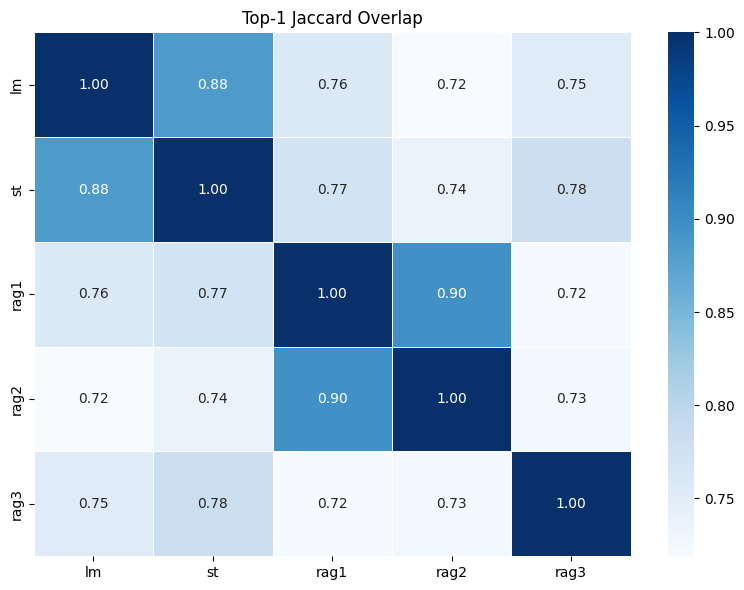

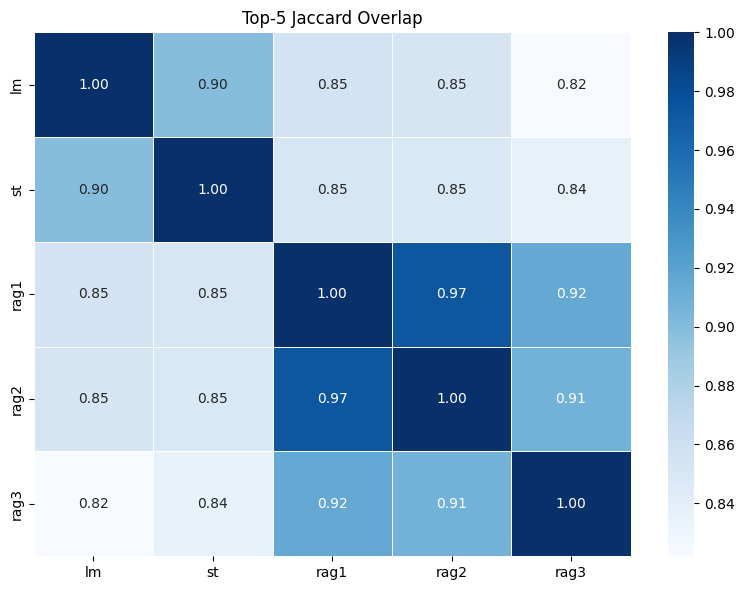

In [10]:
plot_heatmap(top1_overlap, "Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Top-5 Jaccard Overlap")

Sample

In [28]:
import sqlite3

conn = sqlite3.connect('src/KnowledgeDb/vector_db.sqlite')
cursor = conn.cursor()

cursor.execute("SELECT MAX(LENGTH(context)) FROM mt_sap_bert_term_info;")
max_len = cursor.fetchone()[0]

print("Max length of 'context' column:", max_len)

conn.close()

Max length of 'context' column: 6898


In [ ]:
import sqlite3
import csv

conn = sqlite3.connect('src/KnowledgeDb/vector_db.sqlite')
cursor = conn.cursor()

cursor.execute("""
    SELECT * FROM pubmed_bert_term_info
    WHERE LENGTH(context) > 2200;
""")

rows = cursor.fetchall()
columns = [description[0] for description in cursor.description]

with open('long_context_rows.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    writer.writerows(rows)

print(
    f"✅ Exported {len(rows)} rows with long contexts to 'long_context_rows.csv'."
)

conn.close()


✅ Exported 561 rows with long contexts to 'long_context_rows.csv'.


**Treatment**

In [ ]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv(
    './data/corpus/cbio_treatment_name/trt_name_query_for_NCIT:C1909.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

LM Strategy (SapBERT)

In [23]:
# LM Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',  # SapBERT is already CLS so no need to use 'lm' strategy
    **other_params)
lm_sapbert_result = onto_engine_large.run()

14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
14/06//2025 01:43:1749890632 AM - INFO - OntoMapEn

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubmedBERT-fulltext. Creating a new one with mean pooling.


14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 01:43:1749890638 AM - INFO - OntoMapST.get_match_results: Results Generated
14/06//2025 01:4

In [24]:
lm_sapbert_accuracy_df = calc.calc_accuracy(lm_sapbert_result)
print(lm_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  73.875433
1  Top 3 Matches  78.373702
2  Top 5 Matches  80.276817


In [25]:
lm_sapbert_result.to_csv("lm_sapbert_result.csv", index=False)

In [26]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890659 AM - INFO - OntoMapEngine:

In [27]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
lm_pubmedbert_accuracy = lm_pubmedbert_accuracy_df[
    lm_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]

print(lm_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  67.647059
1  Top 3 Matches  70.242215
2  Top 5 Matches  71.799308


In [ ]:
lm_pubmedbert_result.to_csv("lm_pubmedbert_result.csv", index=False)

ST Strategy (PubMedBERT‑MS‑MARCO, SapBERT-mean-token)

In [28]:
# ST Strategy w/ SapBERT-mean-token
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
st_sapbert_result = onto_engine_large.run()

14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890692 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:44:1749890692 AM - INFO - OntoM

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:44:1749890696 AM - INFO - OntoMapST.get_match_results: Generating resu

In [ ]:
st_sapbert_result.to_csv("st_sapbert_result.csv", index=False)

In [29]:
st_sapbert_accuracy_df = calc.calc_accuracy(st_sapbert_result)
print(st_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  73.356401
1  Top 3 Matches  77.335640
2  Top 5 Matches  78.892734


In [30]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:45:1749890708 AM - INFO - OntoMapEngine: Running Ontology Mapping
14/06//2025 01:45:1749890708 AM - INF

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f6790fe7f60 epoll pending=0 ref=0 fileno=115 thread_ident=0x7f6729ff7640>
	Handles:
[]
Exception in worker
Traceback (mo

14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Generating results table
14/06//2025 01:45:1749890715 AM - INFO - OntoMapST.get_match_results: Gen

In [31]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
st_pubmedbert_accuracy = st_pubmedbert_accuracy_df[
    st_pubmedbert_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]

print(st_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  67.820069
1  Top 3 Matches  69.723183
2  Top 5 Matches  70.934256


In [ ]:
st_pubmetbert_result.to_csv("st_pubmedbert_result.csv", index=False)

RAG

In [ ]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13

Processing queries: 100%|██████████| 439/439 [00:07<00:00, 58.18it/s]

13/06//2025 11:29:1749839373 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_result.to_csv("rag_sapbert_result_partially_cleaned_contexts.csv",
                  index=False)

In [ ]:
# RAG Strategy w/ SapBERT
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]

print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 91.34%
  Accuracy Level   Accuracy
0    Top 1 Match  64.464692
1  Top 3 Matches  87.471526
2  Top 5 Matches  91.343964


In [ ]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM

Processing queries:   0%|          | 0/439 [00:00<?, ?it/s]Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f5db426ec00 epoll pending=0 ref=0 fileno=101 thread_ident=0x7

13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated
13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_pubmed_result.to_csv("rag_pubmed_result_partially_cleaned_contexts.csv",
                         index=False)

In [ ]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
rag_pubmed_accuracy = rag_pubmed_accuracy_df[
    rag_pubmed_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_pubmed_accuracy:.2f}%")
print(rag_pubmed_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 93.85%
  Accuracy Level   Accuracy
0    Top 1 Match  70.387244
1  Top 3 Matches  89.293850
2  Top 5 Matches  93.849658


In [ ]:
# RAG Strategy w/ clinical-bert
rag_engine = ome.OntoMapEngine(method='clinical-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_clinical_result = rag_engine.run()

11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Generating results table
11/06//2025 02:08:174963

Processing queries: 100%|██████████| 439/439 [00:16<00:00, 26.07it/s]

11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_clinical_accuracy_df = calc.calc_accuracy(rag_clinical_result)
rag_clinical_accuracy = rag_clinical_accuracy_df[
    rag_clinical_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG ClinicalBERT Top-5 Accuracy: {rag_clinical_accuracy:.2f}%")
print(rag_clinical_accuracy_df)

RAG ClinicalBERT Top-5 Accuracy: 37.81%
  Accuracy Level   Accuracy
0    Top 1 Match  10.022779
1  Top 3 Matches  26.879271
2  Top 5 Matches  37.813212


Comparison

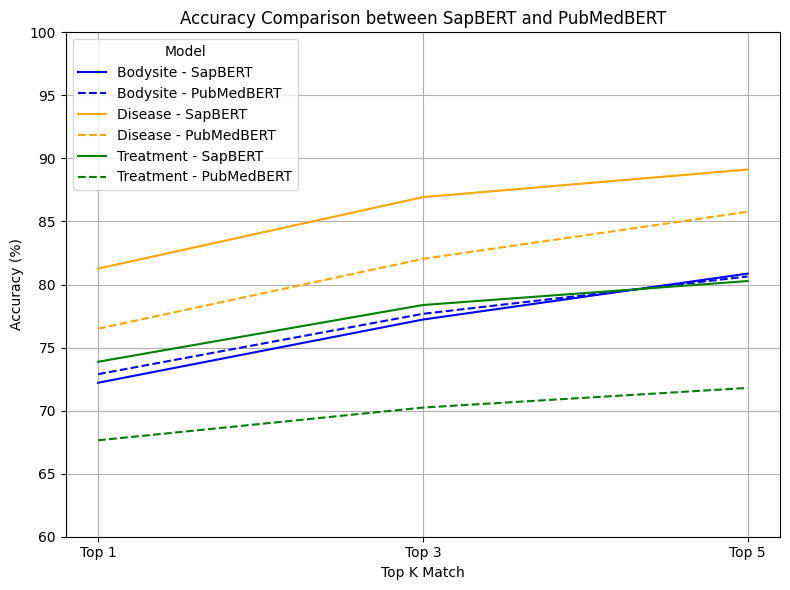

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"data/outputs/Comparison.xlsx"
df = pd.read_excel(file_path)

df["model"] = df["model"].str.replace("–", "-", regex=False)  # en dash
df["model"] = df["model"].str.replace("‑", "-",
                                      regex=False)  # non-breaking hyphen

categories = df["category"].unique()
topks = ["Top 1", "Top 3", "Top 5"]
colors = {"bodysite": "blue", "disease": "orange", "treatment": "green"}
linestyles = {"SapBERT": "solid", "PubMedBERT-MS-MARCO": "dashed"}

plt.figure(figsize=(8, 6))

for cat in categories:
    df_sapbert = df[(df["category"] == cat) & (df["model"] == "SapBERT")]
    if not df_sapbert.empty:
        mean_accuracy = df_sapbert[topks].mean()
        label = f"{cat.capitalize()} - SapBERT"
        plt.plot(topks,
                 mean_accuracy,
                 label=label,
                 color=colors[cat],
                 linestyle=linestyles["SapBERT"])

    df_pubmed_mean = df[(df["category"] == cat)
                        & (df["model"] == "PubMedBERT-MS-MARCO") &
                        (df["pooling strategy"] == "lm")]
    if not df_pubmed_mean.empty:
        mean_accuracy = df_pubmed_mean[topks].mean()
        label = f"{cat.capitalize()} - PubMedBERT"
        plt.plot(topks,
                 mean_accuracy,
                 label=label,
                 color=colors[cat],
                 linestyle=linestyles["PubMedBERT-MS-MARCO"])

plt.title("Accuracy Comparison between SapBERT and PubMedBERT")
plt.xlabel("Top K Match")
plt.ylabel("Accuracy (%)")
plt.ylim(60, 100)
plt.grid(True)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [25]:
!curl "https://api-evsrest.nci.nih.gov/api/v1/metadata/ncit/roles"



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[{"code":"R100","name":"Disease_Has_Associated_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R101","name":"Disease_Has_Primary_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R102","name":"Disease_Has_Metastatic_Anatomic_Site","terminology":"ncit","version":"25.05d"},{"code":"R103","name":"Disease_Has_Normal_Tissue_Origin","terminology":"ncit","version":"25.05d"},{"code":"R104","name":"Disease_Has_Normal_Cell_Origin","terminology":"ncit","version":"25.05d"},{"code":"R105","name":"Disease_Has_Abnormal_Cell","terminology":"ncit","version":"25.05d"},{"code":"R106","name":"Disease_Has_Molecular_Abnormality","terminology":"ncit","version":"25.05d"},{"code":"R107","name":"Disease_Has_Cytogenetic_Abnormality","terminology":"ncit","version":"25.05d"},{"code":"R108","name":"Disease_Has_Finding","terminology":"ncit","version":"25.05d"},{"code":"R110","name":"Disease_Is_Grade","terminology":"ncit","version":"25.05d"},{"code":"R111","name":"Disease_May_Have_Norm

In [26]:
import requests
import pandas as pd

# 获取所有 roles
url = "https://api-evsrest.nci.nih.gov/api/v1/metadata/ncit/roles"
response = requests.get(url)
roles = response.json()

# 转为表格
df = pd.DataFrame(roles)
df.to_csv("ncit_roles.csv", index=False)
print(df.head())

   code                                  name terminology version
0  R100  Disease_Has_Associated_Anatomic_Site        ncit  25.05d
1  R101     Disease_Has_Primary_Anatomic_Site        ncit  25.05d
2  R102  Disease_Has_Metastatic_Anatomic_Site        ncit  25.05d
3  R103      Disease_Has_Normal_Tissue_Origin        ncit  25.05d
4  R104        Disease_Has_Normal_Cell_Origin        ncit  25.05d


Overlapping of different strategies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def compute_overlap_matrix(data_dict):
    methods = list(data_dict.keys())
    matrix = pd.DataFrame(index=methods, columns=methods)

    for m1 in methods:
        for m2 in methods:
            if m1 == m2:
                matrix.loc[m1, m2] = 1.0
            else:
                intersect = len(data_dict[m1] & data_dict[m2])
                union = len(data_dict[m1] | data_dict[m2])
                matrix.loc[m1, m2] = round(intersect / union, 3)
    return matrix


def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float),
                annot=True,
                fmt=".2f",
                cmap="Blues",
                linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
files = {
    'lm':
    'data/outputs/cbio_bodysite/lm_sapbert_result.csv',
    'st':
    'data/outputs/cbio_bodysite/st_sapbert_result.csv',
    'rag1':
    'data/outputs/cbio_bodysite/rag_sapbert_result_removed_duplicates.csv',
    'rag2':
    'data/outputs/cbio_bodysite/rag_sapbert_result_partially_cleaned_contexts.csv',
    'rag3':
    'data/outputs/cbio_bodysite/rag_pubmed_result_partially_cleaned_contexts.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.884  0.759  0.719  0.754
st    0.884    1.0  0.772  0.737  0.781
rag1  0.759  0.772    1.0  0.895  0.721
rag2  0.719  0.737  0.895    1.0  0.726
rag3  0.754  0.781  0.721  0.726    1.0

🔹 Top5 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.899  0.855  0.853  0.822
st    0.899    1.0  0.851  0.849  0.836
rag1  0.855  0.851    1.0  0.973  0.915
rag2  0.853  0.849  0.973    1.0  0.908
rag3  0.822  0.836  0.915  0.908    1.0


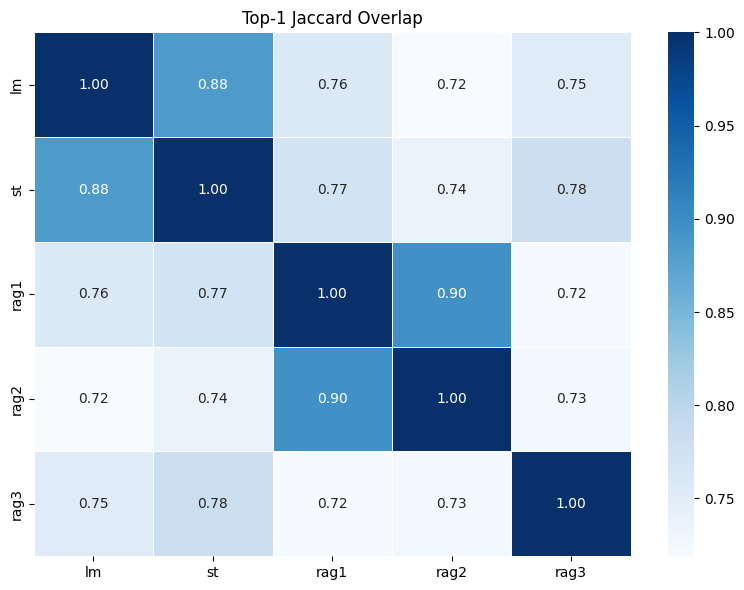

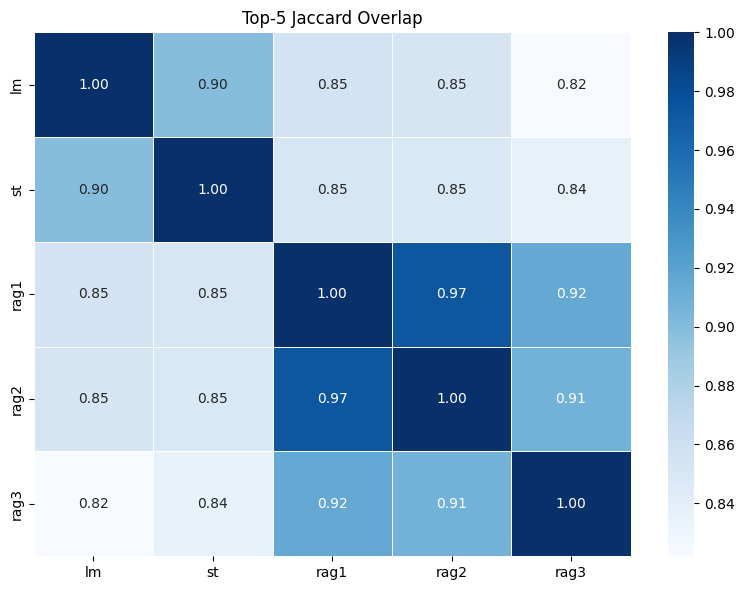

In [ ]:
plot_heatmap(top1_overlap, "Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Top-5 Jaccard Overlap")